# Perspective Transformation

In [1]:
#Perspective Transformation
import cv2
import numpy as np
import matplotlib.pyplot as plt


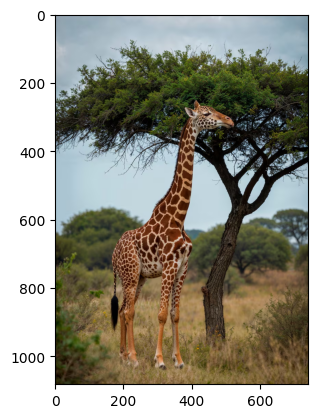

In [2]:
#Read the image
image=cv2.imread("/content/giraffe.avif")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

#
# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# plt.imshow(image)
# plt.title("Original Image")
# plt.subplot(1,2,2)
# plt.imshow(image_rgb)
# plt.title("RGB Image")
# plt.tight_layout()
# plt.show()
plt.imshow(image_rgb)

In [6]:
image_rgb.shape

(1082, 740, 3)

In [7]:
rows,cols,_=image_rgb.shape #_ refers to channes;
print(rows,cols)
#

1082 740


In [137]:
input_points=np.float32([[0,0],[50,rows-50],[cols-50,50],[cols-50,rows-50]])


In [138]:
output_points=np.float32([[10,100],[cols,50],[-50,rows-50],[cols-100,rows-100]])


In [139]:
"""
Transfomration matrix for perspective transformation
3*3
a,b,c
d,e,f
g,h,1

 a,b,c is responsible for horizontal scaling,rotation and tranlation
 d,e,f is responsible for vertical scaling, rotation and tranlation
 g,h is responsible for that account for depth and skew
"""
M=cv2.getPerspectiveTransform(input_points,output_points)
print(M)


[[-1.35594423e-01  6.64058057e-01  1.00000000e+01]
 [ 1.36997586e+00 -1.18194397e-01  1.00000000e+02]
 [ 1.52927727e-05 -6.81406339e-05  1.00000000e+00]]


In [140]:
perspective_Image=cv2.warpPerspective(image_rgb,M,(cols,rows)) #Height and width

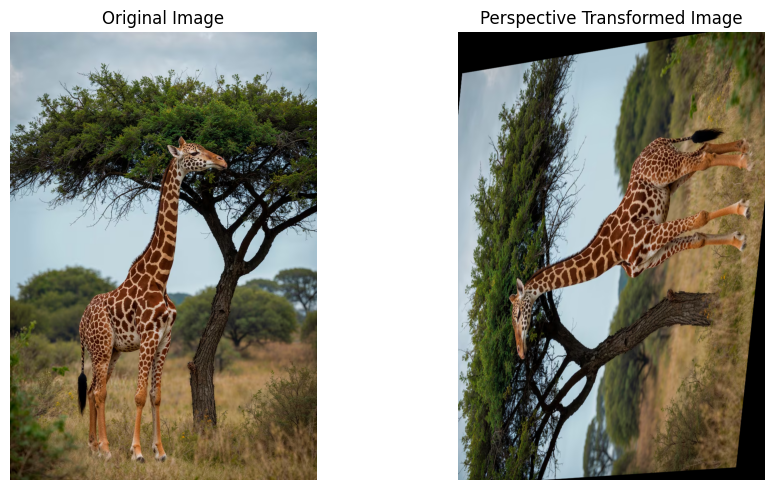

In [141]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_Image)
plt.title("Perspective Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()


#Affine Transformation


In [108]:
Input_points=np.float32([[50,50],[200,50],[50,200]])
Output_points=np.float32([[10,100],[200,50],[100,225]])

In [109]:
A=cv2.getAffineTransform(Input_points,Output_points)
Affine_Image=cv2.warpAffine(image_rgb,A,(cols,rows))



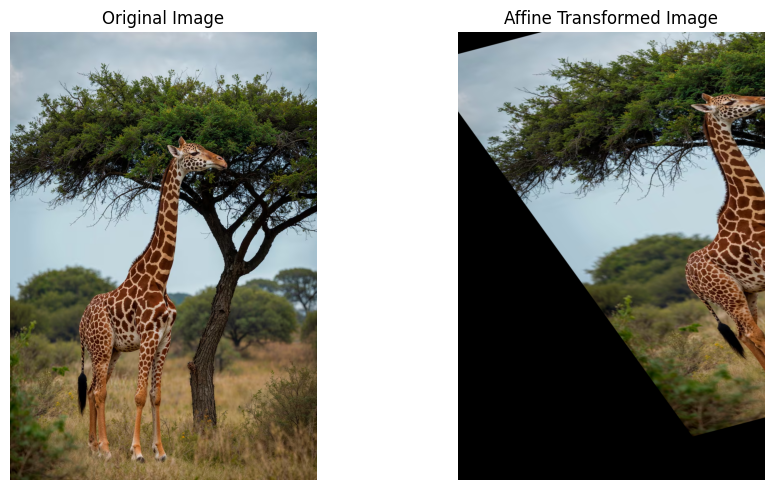

In [110]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(Affine_Image)
plt.title("Affine Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()


#Rotation

In [113]:
angle=90
center=(cols//2,rows//2)
scale=1.0
R=cv2.getRotationMatrix2D(center,angle,scale)

affinr_image=cv2.warpAffine(image_rgb,R,(cols,rows))

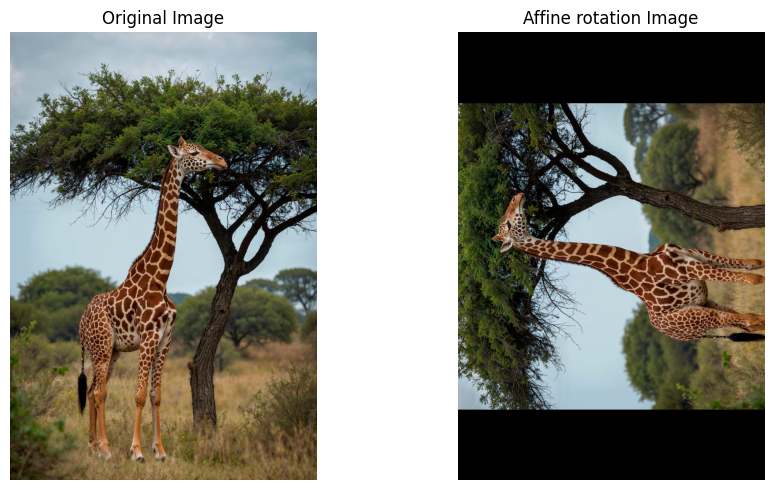

In [114]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affinr_image)
plt.title("Affine rotation Image")
plt.axis('off')

plt.tight_layout()
plt.show()


#Shearing

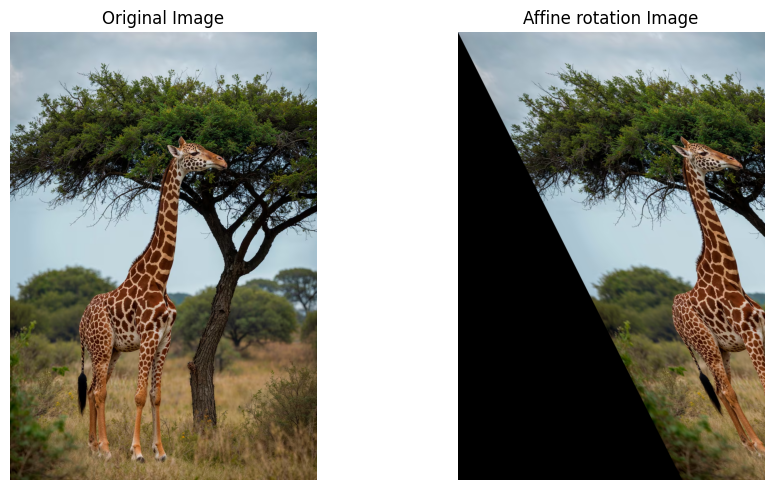

In [117]:
angle=45
center=(cols//2,rows//2)
scale=1.0
shear_x,shear_y=0.5,0
S=np.float32([[1,shear_x,0],[shear_y,1,0]])

# sheared_image=cv2.warpAffine(image_rgb,S,(cols+int(shear_x*rows),rows)) #Cols we can inc width

sheared_image=cv2.warpAffine(image_rgb,S,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Affine rotation Image")
plt.axis('off')

plt.tight_layout()
plt.show()

#Translation

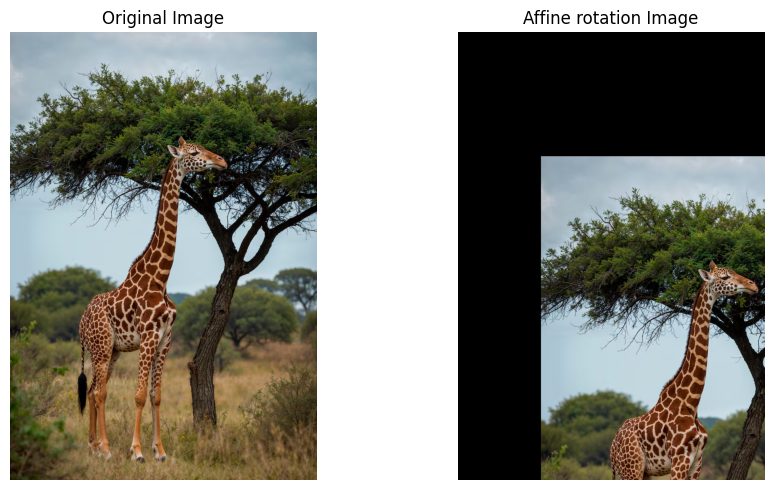

In [118]:
# angle=45
# center=(cols//2,rows//2)
# scale=1.0
tx,ty=200,300
T=np.float32([[1,0,tx],[0,1,ty]])

# sheared_image=cv2.warpAffine(image_rgb,S,(cols+int(shear_x*rows),rows)) #Cols we can inc width

translated_image=cv2.warpAffine(image_rgb,T,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Affine rotation Image")
plt.axis('off')

plt.tight_layout()
plt.show()